In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# 1 Load dataset
df = pd.read_csv("C:\\Users\\raman\\Downloads\\archive (4).zip")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.shape

(6362620, 11)

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
# 2 Select features and target
features = ['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
X = df[features].copy()        # copy to avoid SettingWithCopyWarning
y = df['isFraud'].copy()       # single column Series
y = y.astype(int)              # ensure integer type



In [10]:
#to convert the categorical column int numeric 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.loc[:, 'type'] = le.fit_transform(X['type'])


In [11]:
# 4 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [15]:
# 5️ Apply SMOTE from imblearn
sm = SMOTE(random_state=42,k_neighbors=2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Check new distribution
print(y_train_sm.value_counts())


isFraud
0    5083526
1    5083526
Name: count, dtype: int64


In [16]:
print(X_train.shape)
print(y_train.value_counts())


(5090096, 6)
isFraud
0    5083526
1       6570
Name: count, dtype: int64


In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=80,     # reduce trees
    max_depth=10,        # stop huge trees
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)
model.fit(X_train_sm,y_train_sm) 


,n_estimators,80
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
#predicting the values 
y_pred=model.predict(X_test)
print(y_test.value_counts())


isFraud
0    1270881
1       1643
Name: count, dtype: int64


In [19]:
#identifying the accuracy,precison scores
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print(accuracy)
print(precision)
print(f1score)
print(recall)

0.9857880872973712
0.08264798456696111
0.15257017009512205
0.9908703590992087


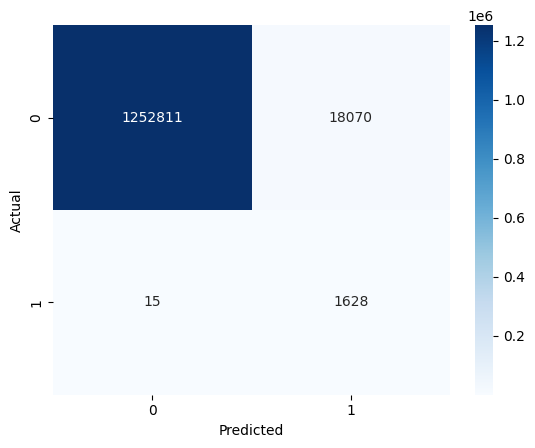

In [20]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


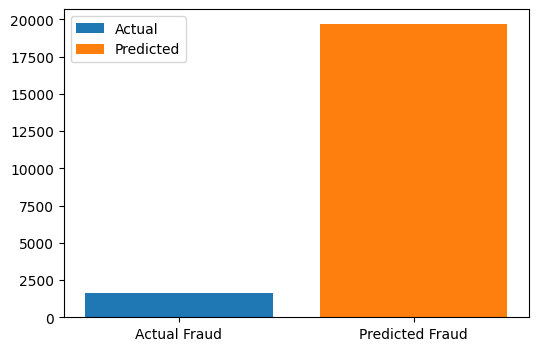

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(["Actual Fraud"], [sum(y_test)], label="Actual")
plt.bar(["Predicted Fraud"], [sum(y_pred)], label="Predicted")
plt.legend()
plt.show()


In [22]:


from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# 1 Get prediction probabilities
y_prob = model.predict_proba(X_test)[:,1]

# 2 Set threshold (try 0.6 / 0.7 / 0.8)
threshold = 0.9
y_pred_new = (y_prob > threshold).astype(int)

# 3 Calculate metrics
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
f1 = f1_score(y_test, y_pred_new)

# 4 Confusion matrix
cm = confusion_matrix(y_test, y_pred_new)

print(f"Threshold: {threshold}")
print("Precision :", precision)
print("Recall    :", recall)
print("F1 Score  :", f1)
print("\nConfusion Matrix:")
print(cm)


Threshold: 0.9
Precision : 0.6451612903225806
Recall    : 0.8642726719415703
F1 Score  : 0.7388137356919875

Confusion Matrix:
[[1270100     781]
 [    223    1420]]


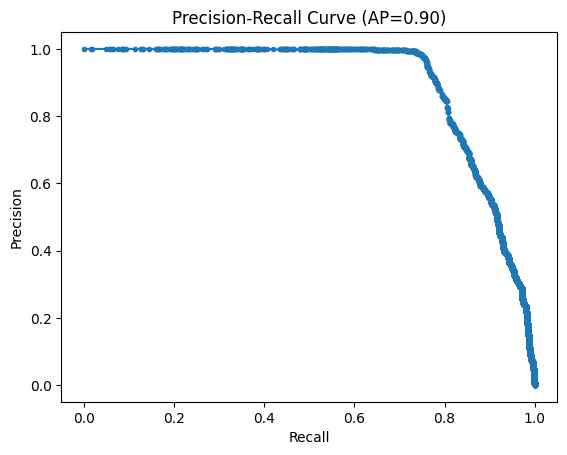

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Correct:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AP={ap:.2f})")
plt.show()
